In [1]:
nb = ipw.IntSlider(min = 3, max = 30, value = 12, description='#bins:', continuous_update=False)

def set_bins(nb):
    global bins
    _, borders = np.histogram(datap, bins = nb)
    bins = np.asarray([[borders[i],borders[i+1]] for i in range(len(borders)-1)])
    
int_bins = ipw.interactive(set_bins, nb = nb)
display(int_bins)

NameError: name 'ipw' is not defined

In [1]:
import pandas as pd

d = pd.read_csv('./Data/data_cheat.csv',
                sep=' ', index_col = 'CID')

import ipywidgets as ipw

su = ipw.Dropdown(options=['SDSS','SNLS','PS1','HST'],
                  description='Survey:',
                  value = 'SNLS')

colors = {'SDSS': 'lime',
          'SNLS': 'red',
          'PS1': 'blue',
          'HST': 'purple'} 

surv = {'SDSS': d[d['IDSURVEY'] == 1],
        'SNLS': d[d['IDSURVEY'] == 4],
        'PS1':  d[d['IDSURVEY'] == 15],
        'HST':  d[d['IDSURVEY'].isin([101, 100, 106])]}

def set_datap(su):
    global datap
    datap = np.sort(surv[su].zCMB.values)
    
int_datap = ipw.interactive(set_datap, su = su)
display(int_datap)

import numpy as np
import iminuit as im
from scipy.stats import poisson
from astropy.cosmology import Planck15 as cdata
import matplotlib.pyplot as plt
plt.style.use('classic')

interactive(children=(Dropdown(description='Survey:', index=1, options=('SDSS', 'SNLS', 'PS1', 'HST'), value='…

In [2]:
ind_max = np.append(np.arange(0,len(datap),10),len(datap)-1)[1:]
z_max = datap[ind_max]

data_max = []
borders_max = []
bins_max = []

binwidth = 0.01

for i in range(len(ind_max)):
    data_max.insert(i,datap[:ind_max[i]+1])
    borders_max.insert(i,np.histogram(data_max[i], bins = np.arange(min(data_max[i]), max(data_max[i]) + binwidth, binwidth))[1])
    bins_max.insert(i,np.asarray([[borders_max[i][k],borders_max[i][k+1]] for k in range(len(borders_max[i])-1)]))
    
data_max = np.asarray(data_max)
borders_max = np.asarray(borders_max)
bins_max = np.asarray(bins_max)

In [3]:
param_guess = [0.1, 0.1, 0.6, 3e-2]

In [4]:
import ratefit

test = ratefit.RateFit()
test.set_data(data_max[-1],bins_max[-1])
test.set_param(param_guess)
test.minimize(param_guess)

/home/nora/Documents/Variabi_Ia/Histo/ratefit.py:48: RuntimeWarning: divide by zero encountered in true_divide
  /self.VOLUME_SCALE)
/home/nora/Documents/Variabi_Ia/Histo/ratefit.py:48: RuntimeWarning: invalid value encountered in multiply
  /self.VOLUME_SCALE)
/home/nora/anaconda3/lib/python3.7/site-packages/scipy/stats/_discrete_distns.py:493: RuntimeWarning: invalid value encountered in greater_equal
  return mu >= 0


RuntimeError: exception was raised in user function
User function arguments:
    p = +0.000000
    a = +0.000000
    r = +nan
    a = +0.000000
Original python exception in user function:
ValueError: operands could not be broadcast together with shapes (94,) (0,) 
  File "/home/nora/Documents/Variabi_Ia/Histo/ratefit.py", line 82, in get_logproba
    return self.get_loglikelihood() + self.get_logprior()
  File "/home/nora/Documents/Variabi_Ia/Histo/ratefit.py", line 66, in get_loglikelihood
    return -np.sum(np.log(poisson.pmf(self.data, self.get_nbSN() )))
  File "/home/nora/Documents/Variabi_Ia/Histo/ratefit.py", line 56, in get_nbSN
    self.get_missedSN(self.bins[:,1]) +\


In [23]:
import ratefit

classes = dict()
a = dict()
logprob = dict()

for i in range(len(ind_max)):
    classes['zmax = ' + str(z_max[i])] = ratefit.RateFit()
    classes['zmax = ' + str(z_max[i])].set_data(data_max[i], bins_max[i])
    classes['zmax = ' + str(z_max[i])].minimize(0.1)
    a['zmax = ' + str(z_max[i])] = classes['zmax = ' + str(z_max[i])].bestparam['a']
    logprob['zmax = ' + str(z_max[i])] = classes['zmax = ' + str(z_max[i])].get_logproba(a['zmax = ' + str(z_max[i])])

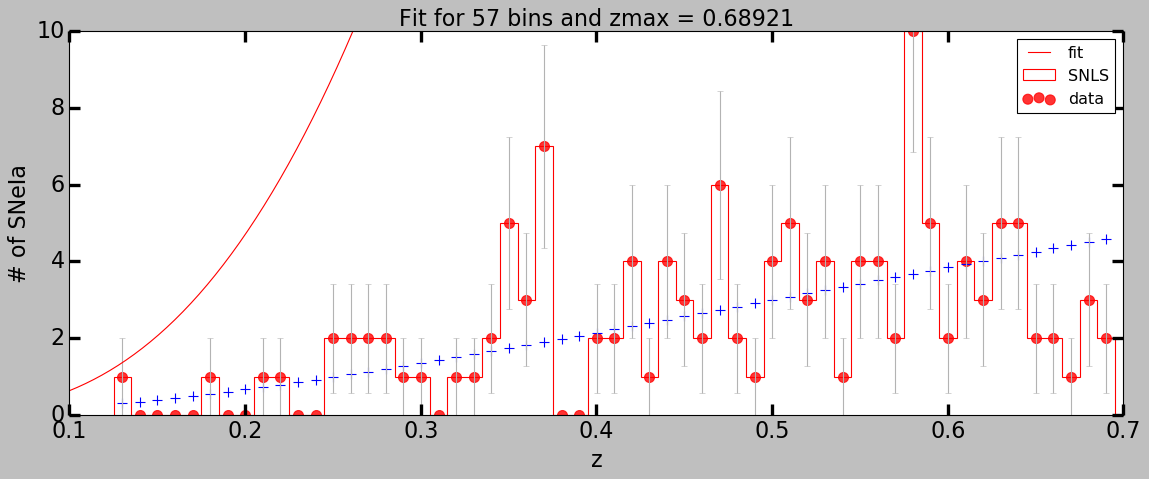

In [27]:
classes['zmax = ' + str(z_max[12])].plt_data_fit(colors[su.value],su.value)

In [33]:
zmax = [i/10 for i in range(2,13)]
BINS = []
for i in range(len(zmax)):
    BINS.insert(i,np.arange(datap[0],zmax[i],0.01))

MAX_IND = []
for k in range(len(zmax)):
    MAX_IND.insert(k,(next(i for i,v in enumerate(datap) if v > zmax[k])))
    
TEST = [(next(i for i,v in enumerate(datap) if v > zmax[k]) for k in range(len(zmax)))]
    
# DATA = []
# for i in range(len(zmax)):
#     temp, _ = 
#     DATA.insert(i,)

StopIteration: 